In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 현상 방지
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [116]:
df = pd.read_csv('bank.csv')
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [9]:
df.info

<bound method DataFrame.info of      age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0     30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1     33;"services";"married";"secondary";"no";4789;...                                                                                                  
2     35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3     30;"management";"married";"tertiary";"no";1476...                                                                                                  
4     59;"blue-collar";"married";"secondary";"no";0;...                                                                                                  
...                                         

In [117]:
df.columns = ['cus_data']
df

,cus_data
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [118]:
df = pd.DataFrame(df.cus_data.str.split(';',17).tolist(),
    columns= ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,"""unemployed""","""married""","""primary""","""no""",1787,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no"""
1,33,"""services""","""married""","""secondary""","""no""",4789,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no"""
2,35,"""management""","""single""","""tertiary""","""no""",1350,"""yes""","""no""","""cellular""",16,"""apr""",185,1,330,1,"""failure""","""no"""
3,30,"""management""","""married""","""tertiary""","""no""",1476,"""yes""","""yes""","""unknown""",3,"""jun""",199,4,-1,0,"""unknown""","""no"""
4,59,"""blue-collar""","""married""","""secondary""","""no""",0,"""yes""","""no""","""unknown""",5,"""may""",226,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,"""services""","""married""","""secondary""","""no""",-333,"""yes""","""no""","""cellular""",30,"""jul""",329,5,-1,0,"""unknown""","""no"""
4517,57,"""self-employed""","""married""","""tertiary""","""yes""",-3313,"""yes""","""yes""","""unknown""",9,"""may""",153,1,-1,0,"""unknown""","""no"""
4518,57,"""technician""","""married""","""secondary""","""no""",295,"""no""","""no""","""cellular""",19,"""aug""",151,11,-1,0,"""unknown""","""no"""
4519,28,"""blue-collar""","""married""","""secondary""","""no""",1137,"""no""","""no""","""cellular""",6,"""feb""",129,4,211,3,"""other""","""no"""


In [51]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [57]:
df.job.unique()

array(['"unemployed"', '"services"', '"management"', '"blue-collar"',
       '"self-employed"', '"technician"', '"entrepreneur"', '"admin."',
       '"student"', '"housemaid"', '"retired"', '"unknown"'], dtype=object)

In [58]:
df['job'] = df['job'].replace('"unemployed"',0) #"unemplyed" -> 0
df['job'] = df['job'].replace('"services"',1)   #"services" -> 1
df['job'] = df['job'].replace('"management"',2) #"management" -> 2
df['job'] = df['job'].replace('"blue-collar"',3) #"blue-collar" -> 3
df['job'] = df['job'].replace('"self-employed"',4) #self-employed -> 4
df['job'] = df['job'].replace('"technician"',5)    #"technician" ->5
df['job'] = df['job'].replace('"entrepreneur"',6)  #"entrepreneur" -> 6
df['job'] = df['job'].replace('"admin."',7)        # "admin." -> 7
df['job'] = df['job'].replace('"student"',8)       #"student" -> 8
df['job'] = df['job'].replace('"housemaid"',9)     #"housemaid" -> 9
df['job'] = df['job'].replace('"retired"',10)      #"retired" -> 10
df['job'] = df['job'].replace('"unknown"',11)      #unknow - > 11


In [60]:
df.marital.unique()

array(['"married"', '"single"', '"divorced"'], dtype=object)

In [61]:
df['marital'] = df['marital'].replace('"married"',0) #married -> 0
df['marital'] = df['marital'].replace('"single"',1)  #single -> 1
df['marital'] = df['marital'].replace('"divorced"',2) #divorced ->2

In [63]:
df.education.unique()

array(['"primary"', '"secondary"', '"tertiary"', '"unknown"'],
      dtype=object)

In [64]:
df['education'] = df['education'].replace('"primary"',0)   #primary -> 0
df['education'] = df['education'].replace('"secondary"',1) #secondary -> 1
df['education'] = df['education'].replace('"tertiary"',2)  #tertiary -> 2
df['education'] = df['education'].replace('"unknown"',3)   #unknown - > 3

In [71]:
df.default.unique()

array(['"no"', '"yes"'], dtype=object)

In [72]:
df['default'] = df['default'].replace('"no"',0) #no -> 0
df['default'] = df['default'].replace('"yes"',1) #yes -> 1

In [75]:
df.housing.unique()

array(['"no"', '"yes"'], dtype=object)

In [76]:
df['housing'] = df['housing'].replace('"no"',0) 
df['housing'] = df['housing'].replace('"yes"',1)

In [78]:
df.loan.unique()

array(['"no"', '"yes"'], dtype=object)

In [79]:
df['loan'] = df['loan'].replace('"no"',0) 
df['loan'] = df['loan'].replace('"yes"',1)

In [81]:
df.contact.unique()

array(['"cellular"', '"unknown"', '"telephone"'], dtype=object)

In [82]:
df['contact'] = df['contact'].replace('"cellular"',0)    # cellular -> 0
df['contact'] = df['contact'].replace('"unknown"',1)     # unknown -> 1
df['contact'] = df['contact'].replace('"telephone"',2)   # telephone -> 2

In [84]:
df.month.unique()

array(['"oct"', '"may"', '"apr"', '"jun"', '"feb"', '"aug"', '"jan"',
       '"jul"', '"nov"', '"sep"', '"mar"', '"dec"'], dtype=object)

In [85]:
df['month'] = df['month'].replace('"jan"',1)  # jan -> 1
df['month'] = df['month'].replace('"feb"',2)  # feb -> 2
df['month'] = df['month'].replace('"mar"',3)  # mar -> 3
df['month'] = df['month'].replace('"apr"',4)  # apr -> 4
df['month'] = df['month'].replace('"may"',5)  # may -> 5
df['month'] = df['month'].replace('"jun"',6)  # jun -> 6
df['month'] = df['month'].replace('"jul"',7)  # jul -> 7
df['month'] = df['month'].replace('"aug"',8)  # aug -> 8
df['month'] = df['month'].replace('"sep"',9)  # sep -> 9
df['month'] = df['month'].replace('"oct"',10) # oct -> 10
df['month'] = df['month'].replace('"nov"',11) # nov -> 11
df['month'] = df['month'].replace('"dec"',12) # dec -> 12

In [87]:
df.poutcome.unique()

array(['"unknown"', '"failure"', '"other"', '"success"'], dtype=object)

In [89]:
df['poutcome'] = df['poutcome'].replace('"unknown"',0)  #unknown -> 0
df['poutcome'] = df['poutcome'].replace('"failure"',1)  #failure -> 1
df['poutcome'] = df['poutcome'].replace('"other"',2)    #other -> 2
df['poutcome'] = df['poutcome'].replace('"success"',3)  #success -> 3

In [91]:
df.y.unique()

array(['"no"', '"yes"'], dtype=object)

In [92]:
df['y'] = df['y'].replace('"no"',0) 
df['y'] = df['y'].replace('"yes"',1)

In [102]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,0,0,0,1787,0,0,0,19,10,79,1,-1,0,0,0
1,33,1,0,1,0,4789,1,1,0,11,5,220,1,339,4,1,0
2,35,2,1,2,0,1350,1,0,0,16,4,185,1,330,1,1,0
3,30,2,0,2,0,1476,1,1,1,3,6,199,4,-1,0,0,0
4,59,3,0,1,0,0,1,0,1,5,5,226,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,0,1,0,-333,1,0,0,30,7,329,5,-1,0,0,0
4517,57,4,0,2,1,-3313,1,1,1,9,5,153,1,-1,0,0,0
4518,57,5,0,1,0,295,0,0,0,19,8,151,11,-1,0,0,0
4519,28,3,0,1,0,1137,0,0,0,6,2,129,4,211,3,2,0


In [113]:
corr = df.corr()
corr

,job,marital,education,default,housing,loan,contact,month,poutcome,y
job,1.000000,-0.012186,-0.088132,-0.002168,-0.160040,0.001375,0.024281,0.027159,0.047513,0.068978
marital,-0.012186,1.000000,0.090907,0.049837,-0.027397,-0.014321,-0.031768,-0.028835,-0.000989,0.061242
education,-0.088132,0.090907,1.000000,-0.010534,-0.087070,-0.054086,-0.110384,0.061689,0.045689,0.042987
default,-0.002168,0.049837,-0.010534,1.000000,0.006881,0.063994,-0.006654,0.008917,-0.031354,0.001303
housing,-0.160040,-0.027397,-0.087070,0.006881,1.000000,0.018451,0.097917,-0.170922,0.006302,-0.104683
loan,0.001375,-0.014321,-0.054086,0.063994,0.018451,1.000000,-0.008376,0.039226,-0.053685,-0.070517
contact,0.024281,-0.031768,-0.110384,-0.006654,0.097917,-0.008376,1.000000,-0.126254,-0.149290,-0.082229
month,0.027159,-0.028835,0.061689,0.008917,-0.170922,0.039226,-0.126254,1.000000,-0.044407,0.023335
poutcome,0.047513,-0.000989,0.045689,-0.031354,0.006302,-0.053685,-0.149290,-0.044407,1.000000,0.246566
y,0.068978,0.061242,0.042987,0.001303,-0.104683,-0.070517,-0.082229,0.023335,0.246566,1.000000


<AxesSubplot:>

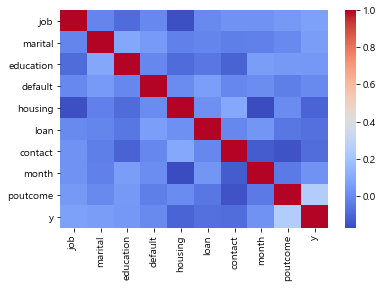

In [114]:
sns.heatmap(corr, cmap='coolwarm')

In [99]:
des = df.describe()
des

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,4.095775,0.498120,1.231365,0.016810,0.566025,0.152842,0.426012,6.166777,0.281132,0.115240
std,2.602310,0.695471,0.748744,0.128575,0.495676,0.359875,0.614626,2.378380,0.678637,0.319347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,0.000000,0.000000
max,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,12.000000,3.000000,1.000000


In [100]:
des['age']

KeyError: 'age'

In [54]:
corr = df.corr()

In [55]:
sns.heatmap(corr)

ValueError: zero-size array to reduction operation fmin which has no identity